# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [48]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [49]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [50]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
#feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
#feature_fns = [hog_feature]
feature_fns = [lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [42]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

#learning_rates = [1e-9, 1e-8, 1e-7]
#regularization_strengths = [5e4, 5e5, 5e6]

learning_rates = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
for i in learning_rates:
    for j in regularization_strengths:
            svm = LinearSVM()
            lrn_reg = (i, j)

            loss = svm.train(X_train_feats, y_train, learning_rate = lrn_reg[0], reg = lrn_reg[1],
                      num_iters = 2000, verbose=True)
            
            y_train_pred = svm.predict(X_train_feats)
            train_accuracy = np.mean(y_train == y_train_pred)
            
            y_val_pred = svm.predict(X_val_feats)
            val_accuracy = np.mean(y_val == y_val_pred)
            if best_val < val_accuracy:
                best_val = val_accuracy
                best_svm = svm
            results[lrn_reg] = (train_accuracy,val_accuracy)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 2000: loss 80.684484
iteration 100 / 2000: loss 79.983093
iteration 200 / 2000: loss 79.266630
iteration 300 / 2000: loss 78.563413
iteration 400 / 2000: loss 77.881362
iteration 500 / 2000: loss 77.188803
iteration 600 / 2000: loss 76.505623
iteration 700 / 2000: loss 75.841190
iteration 800 / 2000: loss 75.164026
iteration 900 / 2000: loss 74.516463
iteration 1000 / 2000: loss 73.878069
iteration 1100 / 2000: loss 73.222049
iteration 1200 / 2000: loss 72.576508
iteration 1300 / 2000: loss 71.928202
iteration 1400 / 2000: loss 71.309398
iteration 1500 / 2000: loss 70.708618
iteration 1600 / 2000: loss 70.087487
iteration 1700 / 2000: loss 69.485380
iteration 1800 / 2000: loss 68.867160
iteration 1900 / 2000: loss 68.275222
iteration 0 / 2000: loss 724.679762
iteration 100 / 2000: loss 656.538607
iteration 200 / 2000: loss 594.908362
iteration 300 / 2000: loss 539.127932
iteration 400 / 2000: loss 488.691726
iteration 500 / 2000: loss 443.030320
iteration 600 / 2000: loss

/home/yoyo/cs231/cs231_environments/assignment1/cs231n/classifiers/linear_svm.py:98: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
/home/yoyo/cs231/cs231_environments/assignment1/cs231n/classifiers/linear_svm.py:98: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)


iteration 300 / 2000: loss inf
iteration 400 / 2000: loss inf
iteration 500 / 2000: loss inf


/home/yoyo/cs231/cs231_environments/assignment1/cs231n/classifiers/linear_svm.py:123: RuntimeWarning: overflow encountered in multiply
  dW += reg*W
/home/yoyo/cs231/cs231_environments/assignment1/cs231n/classifiers/linear_svm.py:118: RuntimeWarning: invalid value encountered in greater
  binary[margins > 0] = 1


iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 80.653867
iteration 100 / 2000: loss 9.000423
iteration 200 / 2000: loss 9.000403
iteration 300 / 2000: loss 9.000438
iteration 400 / 2000: loss 9.000454
iteration 500 / 2000: loss 9.000445
iteration 600 / 2000: loss 9.000472
iteration 700 / 2000: loss 9.000391
iteration 800 / 2000: loss 9.000557
iteration 900 / 2000: loss 9.000291
iteration 1000 / 2000: loss 9.000535
iteration 1100 / 2000: loss 9.000444
iteration 1200 / 2000: loss 9.000423
iteration 1300 / 2000: loss 9.000404
iteration 1400 / 2000: loss 9.000485
iteration 15

/home/yoyo/cs231/cs231_environments/assignment1/cs231n/classifiers/linear_svm.py:87: RuntimeWarning: invalid value encountered in subtract
  margins = scores - correct_class_scores + 1


iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 6862.277869
iteration 100 / 2000: loss inf
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 /

In [43]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.401


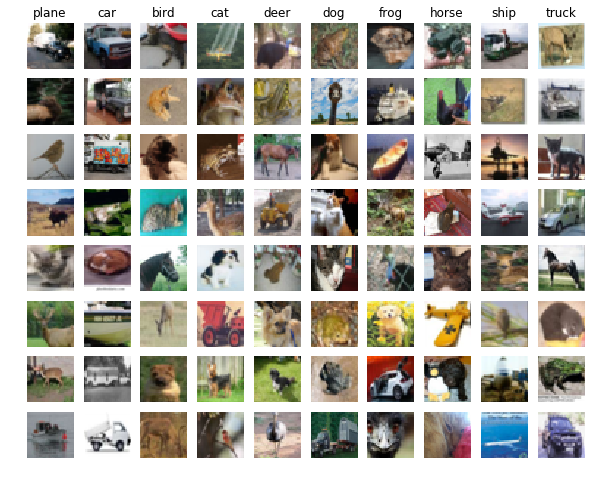

In [44]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [51]:
print(X_train_feats.shape)

(49000, 11)


In [46]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
learning_rates = [1e-1, 1.5e-1, 1.75e-1]
regularization_strengths = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#learning_rates = [1e-1, 5e-1, 1, 5]
#regularization_strengths = [1e-3, 5e-3, 1e-2]
best_val = -1
results = {}

for i in learning_rates:
    for j in regularization_strengths:
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            learning_rate=i, learning_rate_decay=0.95, 
            reg=j, num_iters=1500, batch_size=200,
            verbose=True)
        
        val_acc = (net.predict(X_val_feats) == y_val).mean()
            
        if best_val < val_acc:
            best_val = val_acc
            best_net = net
        results[(i, j)] = val_acc
            
for lr, reg in sorted(results):
    val_accuracy = results[(lr, reg)]
    print('lr %e reg %e  val accuracy: %f' % (
                lr, reg,  val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302564
iteration 200 / 1500: loss 2.231319
iteration 300 / 1500: loss 1.795103
iteration 400 / 1500: loss 1.734301
iteration 500 / 1500: loss 1.637376
iteration 600 / 1500: loss 1.479138
iteration 700 / 1500: loss 1.560374
iteration 800 / 1500: loss 1.585071
iteration 900 / 1500: loss 1.294540
iteration 1000 / 1500: loss 1.309564
iteration 1100 / 1500: loss 1.314217
iteration 1200 / 1500: loss 1.423524
iteration 1300 / 1500: loss 1.449256
iteration 1400 / 1500: loss 1.425060
iteration 0 / 1500: loss 1.323450
iteration 100 / 1500: loss 1.440924
iteration 200 / 1500: loss 1.337432
iteration 300 / 1500: loss 1.293300
iteration 400 / 1500: loss 1.267593
iteration 500 / 1500: loss 1.265965
iteration 600 / 1500: loss 1.358708
iteration 700 / 1500: loss 1.201276
iteration 800 / 1500: loss 1.311848
iteration 900 / 1500: loss 1.420223
iteration 1000 / 1500: loss 1.293081
iteration 1100 / 1500: loss 1.352146
iteration 1200 / 1500: lo

In [52]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.
input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10
net = TwoLayerNet(input_dim, hidden_dim, num_classes)
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            learning_rate=1.75e-1, learning_rate_decay=0.95, 
            reg=1e-4, num_iters=1500, batch_size=200,
            verbose=True)

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

iteration 0 / 1500: loss 2.302585
iteration 100 / 1500: loss 2.302257
iteration 200 / 1500: loss 2.285540
iteration 300 / 1500: loss 2.086557
iteration 400 / 1500: loss 2.032383
iteration 500 / 1500: loss 2.007711
iteration 600 / 1500: loss 2.061383
iteration 700 / 1500: loss 2.068636
iteration 800 / 1500: loss 1.994699
iteration 900 / 1500: loss 2.020904
iteration 1000 / 1500: loss 2.027588
iteration 1100 / 1500: loss 2.086887
iteration 1200 / 1500: loss 2.060904
iteration 1300 / 1500: loss 2.000810
iteration 1400 / 1500: loss 1.966536
0.238


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

In [ ]:
#using both HOG and color histogram together ought to work better than using either alone


# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!